## 0. Import packages and download dataset

In [1]:
#import of packages
import os
import numpy as np
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import qiime2 as q2
from scipy import stats
import seaborn as sns

data_dir = "data/"

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [2]:
#Metadata import 
! wget -nv -O $data_dir/metadata.tsv 'https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download'

2022-12-06 17:54:35 URL:https://polybox.ethz.ch/index.php/s/RVPyoVYUBeVQFrJ/download [325995/325995] -> "data//metadata.tsv" [1]


In [3]:
#Read in metadata 
meta = pd.read_csv('data/metadata.tsv', sep='\t')
meta.head()

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
0,ERR1314182,PAIRED,Illumina MiSeq,2011-11-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,42.1,232.0,NaN,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,fd,True,8.0
1,ERR1314183,PAIRED,Illumina MiSeq,2010-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,...,45.0,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0
2,ERR1314184,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,...,51.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
3,ERR1314185,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,...,50.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
4,ERR1314186,PAIRED,Illumina MiSeq,2013-01-12 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,...,48.0,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0


## 1. Overview of the Dataframe 

In [4]:
meta.shape

(1669, 26)

In [5]:
#How many different host IDs are there?
meta['host_id'].nunique()
#There are 80 unique hosts -> 40 twin pairs 

80

In [7]:
#What different host IDs are there?
hosts = meta['host_id'].unique()
print(sorted(hosts))
#Twins are .1 and .2

[2.1, 2.2, 3.1, 3.2, 4.1, 4.2, 5.1, 5.2, 6.1, 6.2, 8.1, 8.2, 10.1, 10.2, 11.1, 11.2, 12.1, 12.2, 13.1, 13.2, 14.1, 14.2, 15.1, 15.2, 16.1, 16.2, 17.1, 17.2, 18.1, 18.2, 19.1, 19.2, 20.1, 20.2, 21.1, 21.2, 23.1, 23.2, 24.1, 24.2, 25.1, 25.2, 26.1, 26.2, 27.1, 27.2, 28.1, 28.2, 29.1, 29.2, 30.1, 30.2, 32.1, 32.2, 33.1, 33.2, 35.1, 35.2, 36.1, 36.2, 37.1, 37.2, 39.1, 39.2, 40.1, 40.2, 42.1, 42.2, 43.1, 43.2, 44.1, 44.2, 45.1, 45.2, 46.1, 46.2, 47.1, 47.2, 48.1, 48.2]


In [6]:
#How many samples of each single host are there?
meta['host_id'].value_counts()

14.1    30
16.2    29
12.2    28
3.2     28
8.2     28
        ..
48.1     8
46.1     7
11.1     7
46.2     6
11.2     6
Name: host_id, Length: 80, dtype: int64

In [18]:
#get the column names
meta.columns.tolist()

['id',
 'Library Layout',
 'Instrument',
 'collection_date',
 'geo_location_name',
 'geo_latitude',
 'geo_longitude',
 'host_id',
 'age_days',
 'weight_kg',
 'length_cm',
 'WAZ',
 'HAZ',
 'WHZ',
 'BMI',
 'birth_weight_g',
 'birth_length_cm',
 'sex',
 'delivery_mode',
 'zygosity',
 'race',
 'ethnicity',
 'delivery_preterm',
 'diet_milk',
 'diet_weaning',
 'age_months']

In [8]:
#list collection dates by host_id & sample ID (id)
meta_id = meta[['id', 'collection_date', 'host_id']]
meta_id_date = meta_id.groupby(['host_id', 'collection_date', 'id']).count()
meta_id_date

Empty DataFrame
Columns: []
Index: [(2.1, 2010-03-01 00:00:00, ERR1310001), (2.1, 2010-04-02 00:00:00, ERR1311587), (2.1, 2010-04-24 00:00:00, ERR1310002), (2.1, 2010-06-13 00:00:00, ERR1310003), (2.1, 2010-06-25 00:00:00, ERR1311588), (2.1, 2010-08-13 00:00:00, ERR1310657), (2.1, 2010-08-29 00:00:00, ERR1310004), (2.1, 2010-09-30 00:00:00, ERR1311589), (2.1, 2010-10-23 00:00:00, ERR1310658), (2.1, 2010-11-20 00:00:00, ERR1310005), (2.1, 2011-02-23 00:00:00, ERR1310659), (2.1, 2011-03-21 00:00:00, ERR1310006), (2.1, 2011-04-21 00:00:00, ERR1310007), (2.1, 2011-05-20 00:00:00, ERR1311590), (2.1, 2011-07-10 00:00:00, ERR1309847), (2.1, 2011-09-17 00:00:00, ERR1310524), (2.1, 2011-10-21 00:00:00, ERR1311591), (2.1, 2011-11-07 00:00:00, ERR1311592), (2.1, 2011-12-07 00:00:00, ERR1311593), (2.1, 2012-05-03 00:00:00, ERR1310525), (2.1, 2012-07-08 00:00:00, ERR1309848), (2.1, 2012-09-09 00:00:00, ERR1311585), (2.1, 2012-11-02 00:00:00, ERR1311586), (2.2, 2010-03-01 00:00:00, ERR1311594), (2.2, 2010-04-08 00:00:00, ERR1310008), (2.2, 2010-04-24 00:00:00, ERR1310009), (2.2, 2010-06-13 00:00:00, ERR1310010), (2.2, 2010-06-25 00:00:00, ERR1310661), (2.2, 2010-07-28 00:00:00, ERR1310662), (2.2, 2010-08-29 00:00:00, ERR1310011), (2.2, 2010-10-01 00:00:00, ERR1310012), (2.2, 2010-10-23 00:00:00, ERR1311596), (2.2, 2010-11-22 00:00:00, ERR1310013), (2.2, 2011-01-11 00:00:00, ERR1310014), (2.2, 2011-02-22 00:00:00, ERR1310016), (2.2, 2011-03-22 00:00:00, ERR1310663), (2.2, 2011-05-04 00:00:00, ERR1310664), (2.2, 2011-05-20 00:00:00, ERR1311597), (2.2, 2011-07-10 00:00:00, ERR1309849), (2.2, 2011-07-26 00:00:00, ERR1309850), (2.2, 2011-08-12 00:00:00, ERR1311598), (2.2, 2011-09-17 00:00:00, ERR1309851), (2.2, 2011-10-21 00:00:00, ERR1311599), (2.2, 2011-11-06 00:00:00, ERR1309852), (2.2, 2011-12-07 00:00:00, ERR1311600), (2.2, 2012-05-03 00:00:00, ERR1310526), (2.2, 2012-07-08 00:00:00, ERR1309853), (2.2, 2012-09-15 00:00:00, ERR1311595), (2.2, 2012-12-18 00:00:00, ERR1310660), (3.1, 2010-02-21 00:00:00, ERR1315031), (3.1, 2010-03-20 00:00:00, ERR1314998), (3.1, 2010-04-17 00:00:00, ERR1314828), (3.1, 2010-06-12 00:00:00, ERR1314203), (3.1, 2010-07-26 00:00:00, ERR1315467), (3.1, 2010-09-21 00:00:00, ERR1315071), (3.1, 2010-10-24 00:00:00, ERR1315189), (3.1, 2010-11-17 00:00:00, ERR1314860), (3.1, 2010-12-21 00:00:00, ERR1315089), (3.1, 2011-01-17 00:00:00, ERR1314814), (3.1, 2011-02-13 00:00:00, ERR1314261), (3.1, 2011-03-24 00:00:00, ERR1315173), (3.1, 2011-04-21 00:00:00, ERR1315036), (3.1, 2011-05-15 00:00:00, ERR1314639), (3.1, 2011-06-13 00:00:00, ERR1314286), (3.1, 2011-07-26 00:00:00, ERR1315468), (3.1, 2011-08-28 00:00:00, ERR1315600), (3.1, 2011-10-10 00:00:00, ERR1314109), (3.1, 2011-10-21 00:00:00, ERR1315074), (3.1, 2011-11-20 00:00:00, ERR1315020), (3.1, 2011-12-23 00:00:00, ERR1315162), (3.1, 2012-02-01 00:00:00, ERR1313301), (3.1, 2012-05-17 00:00:00, ERR1314832), (3.1, 2012-08-08 00:00:00, ERR1313916), (3.1, 2012-09-22 00:00:00, ERR1315118), (3.1, 2012-11-24 00:00:00, ERR1315202), (3.1, 2013-01-22 00:00:00, ERR1315095), (3.2, 2010-02-21 00:00:00, ERR1315032), (3.2, 2010-03-20 00:00:00, ERR1314999), (3.2, 2010-04-18 00:00:00, ERR1314888), (3.2, 2010-05-15 00:00:00, ERR1314640), (3.2, 2010-06-17 00:00:00, ERR1314844), (3.2, 2010-07-26 00:00:00, ERR1315469), (3.2, 2010-09-24 00:00:00, ERR1315188), (3.2, 2010-10-24 00:00:00, ERR1315190), (3.2, 2010-11-17 00:00:00, ERR1314861), (3.2, 2010-12-13 00:00:00, ERR1314448), (3.2, 2011-01-14 00:00:00, ERR1314449), (3.2, 2011-02-13 00:00:00, ERR1314262), (3.2, 2011-03-22 00:00:00, ERR1315096), (3.2, 2011-04-21 00:00:00, ERR1315037), (3.2, 2011-05-15 00:00:00, ERR1314641), (3.2, 2011-06-13 00:00:00, ERR1314287), (3.2, 2011-07-26 00:00:00, ERR1315470), (3.2, 2011-09-01 00:00:00, ERR1313320), (3.2, 2011-10-10 00:00:00, ERR1314110), (3.2, 2011-10-22 00:00:00, ERR1315120), (3.2, 2011-11-21 00:00:00, ERR1315080), (3.2, 2011-12-23 00:00:00, ERR1315163), (3.2, 2012-02-01 00:00:00, ERR1313302), (3.2

## 2. Distributions of different host characteristics

In [10]:
#Drop duplicates in host id
#here, dropping random NAs is not problematic because the columns of interest (preterm. delivery_mode, birth weight etc.) are all the same for each collection_date within one host_ID
meta_ind = meta.drop_duplicates(subset = ['host_id'])
meta_ind.head()

,id,Library Layout,Instrument,collection_date,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,...,birth_length_cm,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months
0,ERR1314182,PAIRED,Illumina MiSeq,2011-11-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,42.1,232.0,NaN,...,47.0,male,Cesarean,Monozygotic,Caucasian,Not Hispanic,True,fd,True,8.0
1,ERR1314183,PAIRED,Illumina MiSeq,2010-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,...,45.0,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0
2,ERR1314184,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,...,51.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
3,ERR1314185,PAIRED,Illumina MiSeq,2011-12-11 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,...,50.0,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0
4,ERR1314186,PAIRED,Illumina MiSeq,2013-01-12 00:00:00,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,...,48.0,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0


### 2.1 Sexes

Distribution of sexes:
Female: 39
Male: 41


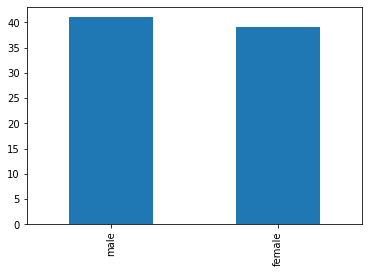

In [16]:
#Sexes frequency 
females = meta_ind['id'][meta_ind['sex'] == "female"].nunique()
males = meta_ind['id'][meta_ind['sex'] == "male"].nunique()
print('Distribution of sexes:')
print('Female:', females)
print('Male:', males)
plot = meta_ind['sex'].value_counts().plot.bar()

In [13]:
#List of sexes frequency 
meta_sex = meta.loc[:, ['host_id', 'sex']]
meta_id_sex = meta_sex.groupby(['host_id', 'sex']).count()
meta_id_sex

,
host_id,sex
2.1,male
2.2,male
3.1,male
3.2,male
4.1,female
...,...
46.2,male
47.1,male
47.2,male


### 2.2 Zygosity

Distribution of Zygosity:
Monozygotic: 42
Dizygotic: 36
Unknown: 2


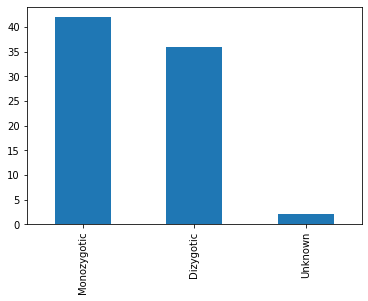

In [19]:
#Distribution of zygosity 
dizygotic = meta_ind['id'][meta_ind['zygosity'] == "Dizygotic"].nunique()
monozygotic = meta_ind['id'][meta_ind['zygosity'] == "Monozygotic"].nunique()
unknown = meta_ind['id'][meta_ind['zygosity'] == "Unknown"].nunique()
print('Distribution of Zygosity:')
print('Monozygotic:', monozygotic)
print('Dizygotic:', dizygotic)
print('Unknown:', unknown)
plot = meta_ind['zygosity'].value_counts().plot.bar()

In [21]:
#Host list with zygosities
meta_zyg = meta.loc[:, ['host_id', 'zygosity']]
meta_id_zyg = meta_zyg.groupby(['host_id', 'zygosity']).count()
meta_id_zyg

,
host_id,zygosity
2.1,Dizygotic
2.2,Dizygotic
3.1,Monozygotic
3.2,Monozygotic
4.1,Dizygotic
...,...
46.2,Dizygotic
47.1,Monozygotic
47.2,Monozygotic


### 2.3 Delivery

#### 2.3.1 Mode of delivery

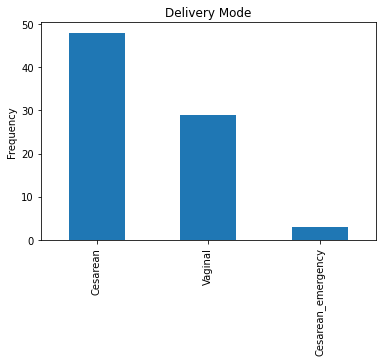

In [23]:
#Frequency of delivery mode 
meta_ind['delivery_mode'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Delivery Mode')
plt.show()

In [24]:
#Total count of different delivery modes
meta_ind.apply(set(['delivery_mode']), axis = 1).value_counts()

delivery_mode     
Cesarean              48
Vaginal               29
Cesarean_emergency     3
dtype: int64

#### 2.3.2 Term of delivery

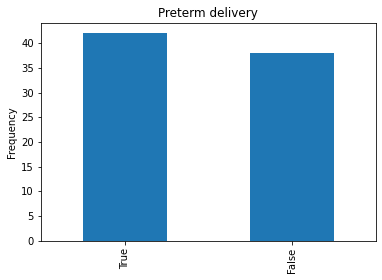

In [25]:
#Term of delivery 
meta_ind['delivery_preterm'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Preterm delivery')
plt.show()

In [26]:
#Total count of different delivery modes
meta_ind.apply(set(['delivery_preterm']), axis = 1).value_counts()

delivery_preterm
True                42
False               38
dtype: int64

#### 2.3.3 Term of delivery by Mode of delivery

Percentage of preterm deliveries for different delivery modes:
Cesarean: 58.33
Vaginal: 41.38
Cesarean Emergency: 66.67


Text(0.5, 1.0, 'Percentage of preterm deliveries for different delivery modes')

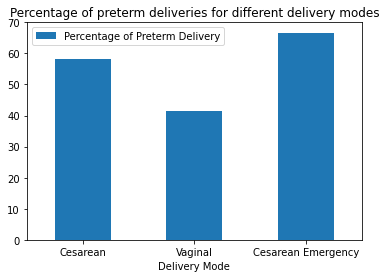

In [27]:
ces = meta_ind[meta_ind['delivery_mode'] == 'Cesarean']
vag = meta_ind[meta_ind['delivery_mode'] == 'Vaginal']
emerg = meta_ind[meta_ind['delivery_mode'] == 'Cesarean_emergency']

ces_tot = ces['id'].nunique()
vag_tot = vag['id'].nunique()
emerg_tot = emerg['id'].nunique()

ces_pre = ces['delivery_preterm'].sum()
vag_pre = vag['delivery_preterm'].sum()
emerg_pre = emerg['delivery_preterm'].sum()

print('Percentage of preterm deliveries for different delivery modes:')
print('Cesarean:', round(ces_pre/ces_tot*100,2))
print('Vaginal:', round(vag_pre/vag_tot*100,2))
print('Cesarean Emergency:', round(emerg_pre/emerg_tot*100, 2))

modes = pd.DataFrame({'Delivery Mode':['Cesarean', 'Vaginal', 'Cesarean Emergency'], 'Percentage of Preterm Delivery':[(ces_pre/ces_tot)*100, (vag_pre/vag_tot)*100, (emerg_pre/emerg_tot)*100]})
plot = modes.plot.bar(x='Delivery Mode', y='Percentage of Preterm Delivery', rot=0)
plt.title('Percentage of preterm deliveries for different delivery modes')

#### 2.3.4 Further investigation of preterm baby

**Differences in birth weight in preterm and non-preterm delivery babies**

Preterm average weight: 2404.62
Non-preterm average weight: 2813.95
Difference: -409.33


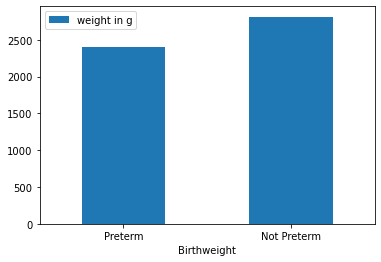

In [30]:
preterm = meta_ind[meta_ind['delivery_preterm'] == True]
notpreterm = meta_ind[meta_ind['delivery_preterm'] == False]
#calculate average
preterm_weight = preterm['birth_weight_g'].mean()
notpreterm_weight = notpreterm['birth_weight_g'].mean()

print('Preterm average weight:', round(preterm_weight,2))
print('Non-preterm average weight:', round(notpreterm_weight, 2))
print('Difference:', round(preterm_weight - notpreterm_weight,2))

weights = pd.DataFrame({'Birthweight':['Preterm', 'Not Preterm'], 'weight in g':[preterm_weight, notpreterm_weight]})
plot = weights.plot.bar(x='Birthweight', y = 'weight in g', rot=0)

**Comparing birth weight of preterm/not preterm**

Index(['id', 'Library Layout', 'Instrument', 'collection_date',
       'geo_location_name', 'geo_latitude', 'geo_longitude', 'host_id',
       'age_days', 'weight_kg', 'length_cm', 'WAZ', 'HAZ', 'WHZ', 'BMI',
       'birth_weight_g', 'birth_length_cm', 'sex', 'delivery_mode', 'zygosity',
       'race', 'ethnicity', 'delivery_preterm', 'diet_milk', 'diet_weaning',
       'age_months'],
      dtype='object')


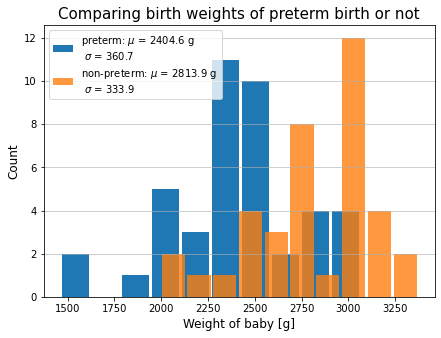

In [31]:
print(meta_ind.columns)
plt.figure(figsize = (7, 5))
plt.hist(preterm['birth_weight_g'], rwidth=0.9)
plt.hist(notpreterm['birth_weight_g'], alpha = 0.8, rwidth=0.9)
plt.legend([f'preterm: $\mu$ = {round(preterm.birth_weight_g.mean(), 1)} g \n $\sigma$ = {round((preterm.birth_weight_g.var())**(1/2), 1)} ', 
            f'non-preterm: $\mu$ = {round(notpreterm.birth_weight_g.mean(), 1)} g \n $\sigma$ = {round((notpreterm.birth_weight_g.var())**(1/2), 1)}'])
plt.xlabel('Weight of baby [g]', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Comparing birth weights of preterm birth or not', fontsize = 15)
plt.grid(axis='y', alpha=0.75)

**Comparing birth height of preterm/not preterm**

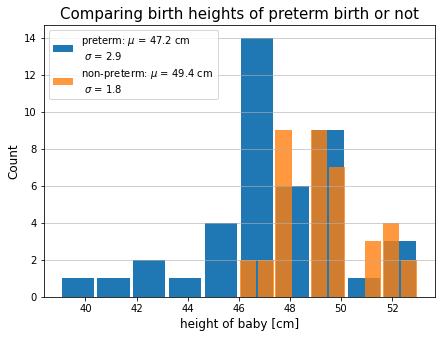

In [32]:
plt.figure(figsize = (7, 5))
plt.hist(preterm['birth_length_cm'], rwidth=0.9)
plt.hist(notpreterm['birth_length_cm'], alpha = 0.8, rwidth=0.9)
plt.legend([f'preterm: $\mu$ = {round(preterm.birth_length_cm.mean(), 1)} cm \n $\sigma$ = {round((preterm.birth_length_cm.var())**(1/2), 1)} ', 
            f'non-preterm: $\mu$ = {round(notpreterm.birth_length_cm.mean(), 1)} cm \n $\sigma$ = {round((notpreterm.birth_length_cm.var())**(1/2), 1)}'])
plt.xlabel('height of baby [cm]', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Comparing birth heights of preterm birth or not', fontsize = 15)
plt.grid(axis='y', alpha=0.75)

### 2.4 Race & Ethnicity

#### 2.4.1 Race

Distribution of Race:
African-American: 10
Caucasian: 70


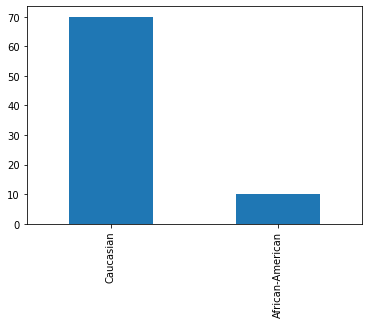

In [33]:
caucasian = meta_ind['id'][meta_ind['race'] == "Caucasian"].nunique()
africanamerican = meta_ind['id'][meta_ind['race'] == "African-American"].nunique()


print('Distribution of Race:')
print('African-American:', africanamerican)
print('Caucasian:', caucasian)

plot = meta_ind['race'].value_counts().plot.bar()

#### 2.4.2 Ethnicity 

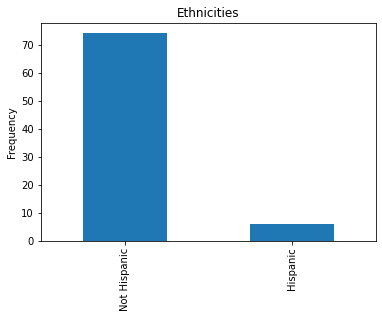

In [34]:
#Ethnicity distribution
meta_ind['ethnicity'].value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Ethnicities')
plt.show()

In [35]:
#Total count of hispanics
meta_ind.apply(set(['ethnicity']), axis = 1).value_counts()

ethnicity   
Not Hispanic    74
Hispanic         6
dtype: int64

### 2.5 Diet

#### 2.5.1 Weaning

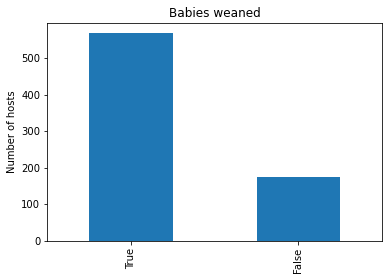

In [39]:
#Weaning
meta['diet_weaning'].value_counts().plot(kind='bar')
plt.ylabel('Number of hosts')
plt.title('Babies weaned')
plt.show()

In [40]:
#Total count of Babies that have been weaned
meta.apply(set(['diet_weaning']), axis = 1).value_counts()

diet_weaning
True            568
False           175
dtype: int64

Most of the Babies have already been weaned (introduced to solid foods) at one of the measurement points. *However, this plot does not say much because babies have been weaned at one point of the sampling dates and not from the beginning*

#### 2.5.2 Types of Milk 

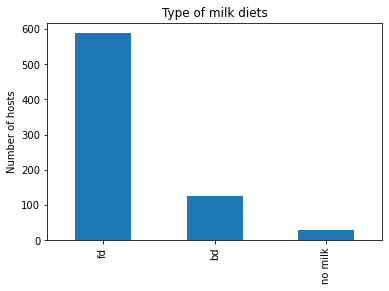

In [41]:
#Milk diet
meta['diet_milk'].value_counts().plot(kind='bar')
plt.ylabel('Number of hosts')
plt.title('Type of milk diets')
plt.show()

In [42]:
#Total count of Babies for different diets
meta.apply(set(['diet_milk']), axis = 1).value_counts()

diet_milk
fd           588
bd           125
no milk       30
dtype: int64

This plot also does not say much as the type of diet per host changes over time

#### 2.5.3 Distribution of milk diets over host age

Text(0, 0.5, 'age [months]')

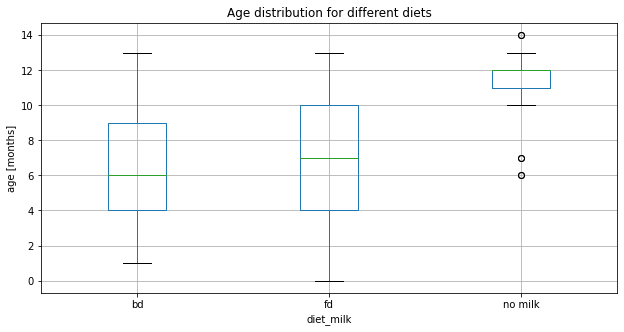

In [44]:
#Mean distribution for different diets 
meta.boxplot(column = 'age_months', by = 'diet_milk', figsize=(10,5));
plt.suptitle("")
plt.title("Age distribution for different diets")
plt.ylabel("age [months]")

In [45]:
#Simple Anova test 
meta_diet_age = meta[['diet_milk', 'age_months']].dropna()
meta_diet = meta_diet_age.groupby('diet_milk').groups
meta_diet

#Extract individual groups
bd = meta_diet["bd"]
fd = meta_diet["fd"]
no_milk = meta_diet["no milk"]

#Perform ANOVA
stats.f_oneway(bd, fd, no_milk)

F_onewayResult(statistic=4.624713837201709, pvalue=0.01009162134284619)

## 3. Plots for Report figures 

**Stacked Barplot of relative distribution of diet over age (months)**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


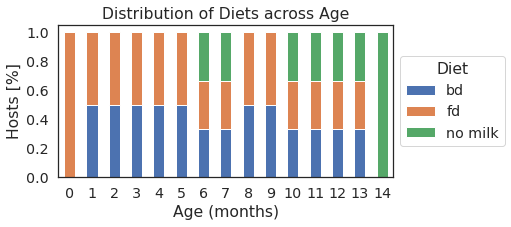

In [47]:
subset = meta[['age_months', 'diet_milk']].sort_values(by = ['age_months']) #order according to age
subset[['number']] = 1
countdf = subset.groupby(['age_months','diet_milk'])['number'].sum().reset_index()

# reshape the data sligthly before plotting
stacked = countdf.groupby(['age_months', 'diet_milk']) \
                .count() \
                .reset_index() \
                .pivot('age_months', 'diet_milk', 'number')
stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (6, 2.8), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.3):
    # matplotlib's bar plot
    ax = stacked_rel.plot(kind='bar', stacked=True)
    
    # matplotlib's customization
    ax.set_xlabel('Age (months)')
    ax.set_ylabel('Hosts [%]')
    ax.set_title('Distribution of Diets across Age')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend = ax.get_legend()
    legend.set_title('Diet')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace('.0', '') for l in xlabels]
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)
    
#Download 
plt.savefig("data/Diets_Age.eps", bbox_inches='tight')

**Stacked barplot of relative distribution of term of birth over mode of birth**

/tmp/ipykernel_208/2285194472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2[['number']] = 1
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


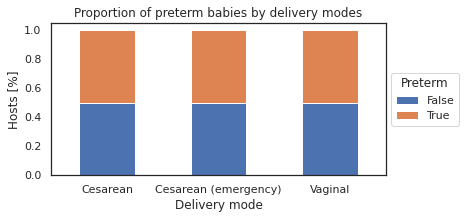

In [49]:
#Delivery mode 
subset2 = meta_ind[['delivery_mode', 'delivery_preterm']]
subset2[['number']] = 1
Delivery = subset2.groupby(['delivery_mode','delivery_preterm'])['number'].sum().reset_index()

# reshape the data sligthly before plotting
stacked = Delivery.groupby(['delivery_mode', 'delivery_preterm']) \
                .count() \
                .reset_index() \
                .pivot('delivery_mode', 'delivery_preterm', 'number')
stacked_rel = stacked.div(stacked.sum(axis=1), axis=0)

sns.set(rc={'figure.figsize': (6, 2.8), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.0):
    # matplotlib's bar plot
    ax = stacked_rel.plot(kind='bar', stacked=True)
    
    # matplotlib's customization
    ax.set_xlabel('Delivery mode')
    ax.set_ylabel('Hosts [%]')
    ax.set_title('Proportion of preterm babies by delivery modes')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    legend = ax.get_legend()
    legend.set_title('Preterm')
    
    xlabels = ax.get_xticklabels()
    xlabels = [l.get_text().replace('Cesarean_emergency', 'Cesarean (emergency)') for l in xlabels]
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)
    
#Download 
plt.savefig("data/Preterm_DeliveryMode.eps", bbox_inches='tight')

**3 simple plots about zygosity, delivery mode, preterm**

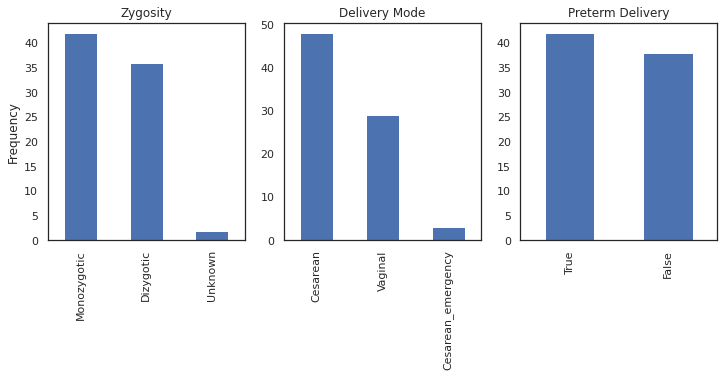

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
meta_ind['zygosity'].value_counts().plot(kind='bar', ax = ax1)
meta_ind['delivery_mode'].value_counts().plot(kind='bar', ax = ax2)
meta_ind['delivery_preterm'].value_counts().plot(kind='bar', ax = ax3)

#Set titles of subplots
ax1.set_title('Zygosity')
ax2.set_title('Delivery Mode')
ax3.set_title('Preterm Delivery')

#Set axis labels 
ax1.set_ylabel('Frequency')


#Download 
plt.savefig("data/Zygosity_DeliveryMode_Preterm.eps", bbox_inches='tight')

**Minimum and maximum host age for weaning**

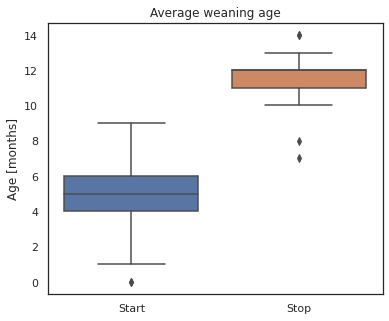

In [51]:
#Minimum Weaning age 
meta_wean_T = meta[meta['diet_weaning']==True].copy()
meta_wean = meta_wean_T[['host_id', 'age_months']]
meta_wean_min = meta_wean.groupby(['host_id']).min().assign(Location = 'Start')

#Maximum weaning age 
meta_wean_max = meta_wean.groupby(['host_id']).max().assign(Location = 'Stop')

#Reorganize the data
c_meta_wean = pd.concat([meta_wean_min, meta_wean_max])    
m_meta_wean = pd.melt(c_meta_wean, id_vars=['Location'])
m_meta_wean.head()

#plot
sns.set(rc={'figure.figsize': (6, 5), 'font.family': ['Helvetica']}, style='white', color_codes=True)
with sns.plotting_context("notebook", font_scale=1.0):
    #Boxplot
    ax = sns.boxplot(x="Location", y="value", data=m_meta_wean)    
    
    # matplotlib's customization
    ax.set_xlabel('')
    ax.set_ylabel('Age [months]')
    ax.set_title('Average weaning age')
    
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(xlabels)
    ax.set_xticklabels(xlabels, rotation=0)



#Download
plt.savefig("data/Weaning.eps", bbox_inches='tight')

In [52]:
meta_wean_min.describe()

,age_months
count,80.000000
mean,4.887500
std,1.841805
min,0.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,9.000000


In [53]:
meta_wean_max.describe()

,age_months
count,80.000000
mean,11.750000
std,1.012579
min,7.000000
25%,11.000000
50%,12.000000
75%,12.000000
max,14.000000
